In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [291]:
import yfinance as yf

start = '2010-01-01'
end = '2023-12-31'
df = yf.download('AAPL', start=start, end=end)
print(df)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2010-01-04 00:00:00+00:00    6.447412    7.643214    7.660714    7.585000   
2010-01-05 00:00:00+00:00    6.458559    7.656429    7.699643    7.616071   
2010-01-06 00:00:00+00:00    6.355827    7.534643    7.686786    7.526786   
2010-01-07 00:00:00+00:00    6.344077    7.520714    7.571429    7.466071   
2010-01-08 00:00:00+00:00    6.386254    7.570714    7.571429    7.466429   
...                               ...         ...         ...         ...   
2023-12-22 00:00:00+00:00  192.656174  193.600006  195.410004  192.970001   
2023-12-26 00:00:00+00:00  192.108856  193.050003  193.889999  192.830002   
2023-12-27 00:00:00+00:00  192.208374  193.149994  193.500000  191.089996   
2023-12-28 00:00:00+00:00  192.636292  193.580002  194.660004  193.169998   

In [292]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-12-22 00:00:00+00:00,192.656174,193.600006,195.410004,192.970001,195.179993,37122800
2023-12-26 00:00:00+00:00,192.108856,193.050003,193.889999,192.830002,193.610001,28919300
2023-12-27 00:00:00+00:00,192.208374,193.149994,193.500000,191.089996,192.490005,48087700
2023-12-28 00:00:00+00:00,192.636292,193.580002,194.660004,193.169998,194.139999,34049900
2023-12-29 00:00:00+00:00,191.591370,192.529999,194.399994,191.729996,193.899994,42628800


In [295]:
df=df.reset_index()
df.head()

Price,index,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,0,2010-01-04 00:00:00+00:00,6.447412,7.643214,7.660714,7.585000,7.622500,493729600
1,1,2010-01-05 00:00:00+00:00,6.458559,7.656429,7.699643,7.616071,7.664286,601904800
2,2,2010-01-06 00:00:00+00:00,6.355827,7.534643,7.686786,7.526786,7.656429,552160000
3,3,2010-01-07 00:00:00+00:00,6.344077,7.520714,7.571429,7.466071,7.562500,477131200
4,4,2010-01-08 00:00:00+00:00,6.386254,7.570714,7.571429,7.466429,7.510714,447610800


In [296]:
df=df.drop(['index','Date','Adj Close'], axis=1)
df.head()

C:\Users\mayan\AppData\Local\Temp\ipykernel_3536\3336123933.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(['index','Date','Adj Close'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.643214,7.660714,7.585000,7.622500,493729600
1,7.656429,7.699643,7.616071,7.664286,601904800
2,7.534643,7.686786,7.526786,7.656429,552160000
3,7.520714,7.571429,7.466071,7.562500,477131200
4,7.570714,7.571429,7.466429,7.510714,447610800


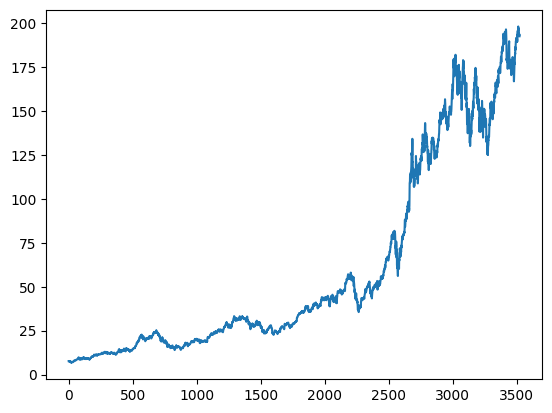

In [297]:
plt.plot(df.Close)

In [298]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3517,181.768301
3518,181.787101
3519,181.898701
3520,182.046001


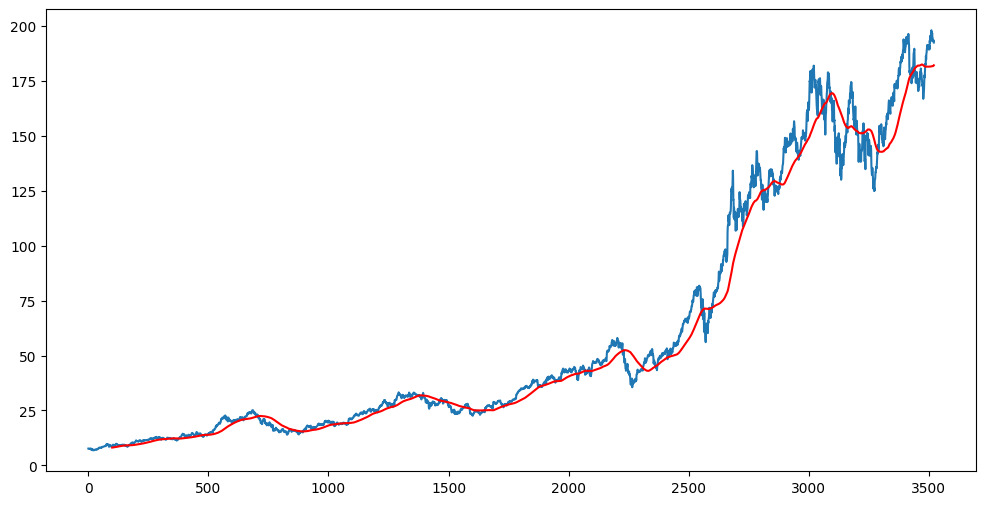

In [299]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [300]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3517,178.649100
3518,178.871851
3519,179.085250
3520,179.290201


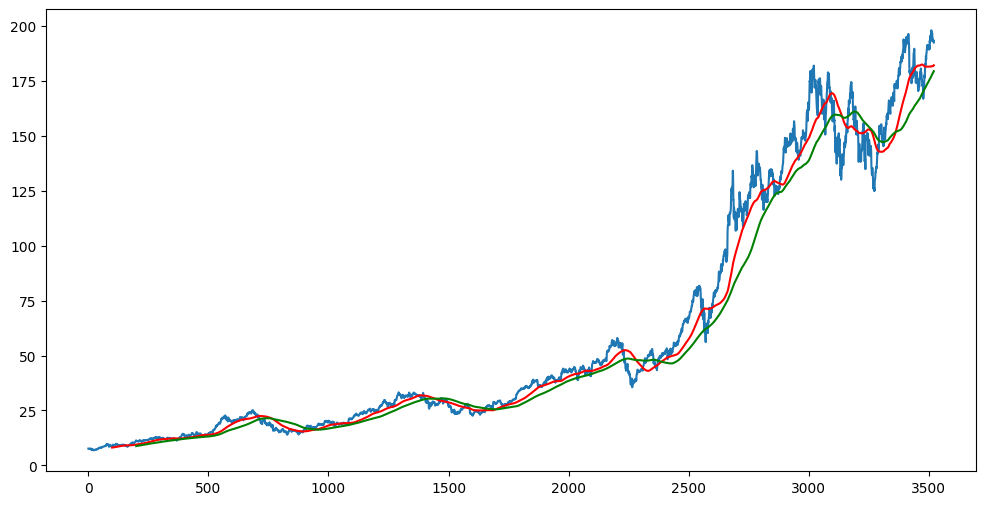

In [301]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [302]:
df.shape

(3522, 5)

In [303]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])


In [304]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [305]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01502647],
       [0.01527965],
       [0.01294631],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [306]:
X_train=[]
Y_train=[]
for i in range(100,data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    Y_train.append(data_training_array[i,0])

In [307]:
X_train

[array([[1.50264684e-02],
        [1.52796526e-02],
        [1.29463071e-02],
        [1.26794281e-02],
        [1.36374041e-02],
        [1.23578431e-02],
        [1.07224283e-02],
        [1.27273278e-02],
        [1.18925316e-02],
        [9.49760070e-03],
        [1.57312602e-02],
        [1.34663520e-02],
        [1.09619177e-02],
        [3.90030483e-03],
        [7.54060090e-03],
        [9.50444351e-03],
        [1.08319225e-02],
        [4.95407114e-03],
        [6.83368042e-06],
        [1.83381997e-03],
        [2.60703994e-03],
        [4.91301424e-03],
        [0.00000000e+00],
        [2.33332729e-03],
        [1.41641731e-03],
        [2.83285288e-03],
        [2.10068067e-03],
        [4.52982566e-03],
        [5.69992898e-03],
        [7.76641384e-03],
        [7.18479272e-03],
        [7.44480147e-03],
        [6.58262488e-03],
        [5.72729111e-03],
        [3.42815963e-03],
        [5.89152784e-03],
        [6.80843782e-03],
        [8.60121003e-03],
        [1.1

In [308]:
Y_train

[0.041945486689831446,
 0.044360955182248,
 0.04706380368955704,
 0.049198725847496266,
 0.048630781226253694,
 0.043731434349777804,
 0.04029641362878891,
 0.03919474760399791,
 0.03500018340392291,
 0.04000218166160849,
 0.042054990023329075,
 0.04258185947458956,
 0.04628374089735268,
 0.05145680042789072,
 0.05461810849481746,
 0.05612347327654099,
 0.053454847986926096,
 0.05597294958867957,
 0.054002255023177625,
 0.05265426588160346,
 0.05108043639261886,
 0.05217526873699471,
 0.04387512435722407,
 0.0407001306575942,
 0.03861311735005221,
 0.037559360175658474,
 0.038715768731261896,
 0.0455857736294942,
 0.04518890855297686,
 0.04623585031882818,
 0.0446415015167253,
 0.04088487756314976,
 0.041521232076035114,
 0.040645388126781756,
 0.03958477900010007,
 0.03662873715184717,
 0.04094645377437736,
 0.04255448820918334,
 0.045825281337734974,
 0.046454802170205145,
 0.046003194562875355,
 0.04928767332413009,
 0.04715275116619086,
 0.045202594185679956,
 0.044614130251319106,

In [309]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [310]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [311]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

c:\Users\mayan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [312]:
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

In [313]:
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

In [314]:
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

In [315]:
model.add(Dense(units=1))

In [316]:
model.summary

<bound method Model.summary of <Sequential name=sequential_8, built=True>>

In [317]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - loss: 0.0768
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0073
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 0.0062
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0068
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0054
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 0.0049
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 0.0047
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - loss: 0.0046
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 0.0043
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0046
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - loss: 0.0035
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - loss: 0.0037
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 0.0037
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 176ms/step - loss: 0.0038
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step 

In [318]:
model.save('stock_lstm.h5')

In [319]:
past_100_days=data_training.tail(100)

In [320]:

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [321]:
input_data=scaler.fit_transform(final_df)

In [322]:
input_data.shape

(1157, 1)

In [323]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i]) 
    y_test.append(input_data[i,0])

In [324]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [325]:
y_predict=model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


In [326]:
scaler.scale_

array([0.00646057])

In [327]:
scale_factor=1/scaler.scale_

In [328]:
y_predict=y_predict*scale_factor
y_test=y_test*scale_factor

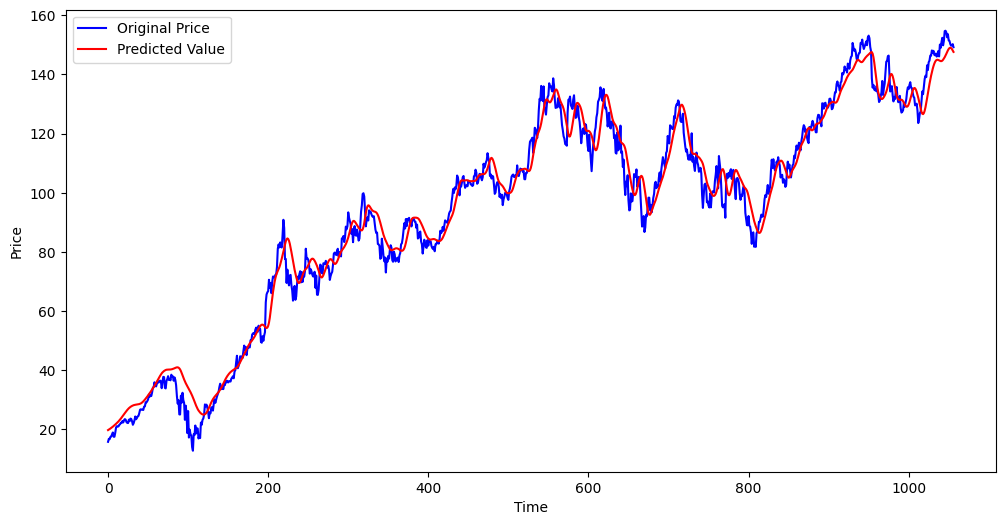

In [329]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predict,'r',label='Predicted Value')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [330]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

gru_model = Sequential()


gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.2))


gru_model.add(GRU(units=50, return_sequences=True))
gru_model.add(Dropout(0.2))


gru_model.add(GRU(units=50))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(units=1))

gru_model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\mayan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [331]:
gru_model.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - loss: 0.0366
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0033
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0028
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0025
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0021
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 0.0022
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 0.0018
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - loss: 0.0016
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0016
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0018
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 0.0018
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 0.0015
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 0.0018
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 0.0014
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - l

In [368]:
gru_model.save('stock_gru.h5')

In [370]:
past_100_days1=data_training.tail(100)

In [371]:
final_df1 = pd.concat([past_100_days1, data_testing], ignore_index=True)

In [372]:
input_data1=scaler.fit_transform(final_df1)


In [365]:
x_test1=[]
y_test1=[]
for i in range(100,input_data.shape[0]):
    x_test1.append(input_data[i-100:i]) 
    y_test1.append(input_data[i,0])

In [373]:

x_test1=np.array(x_test)
y_test1=np.array(y_test)

In [374]:
y_predict1=gru_model.predict(x_test1)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


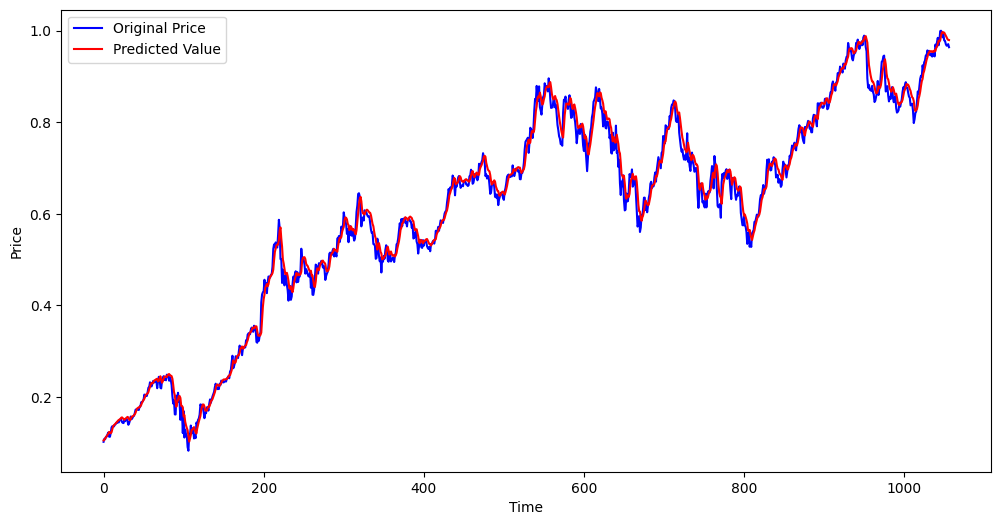

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predict1,'r',label='Predicted Value')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()